# Static Visualizations for Checkpoint 1

## Importing data, packages

In [2]:
# importing packages
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# load data
df = pd.read_csv('emergency_service_routing_with_timestamps.csv')
df.head(3)

Timestamp Incident_Severity   Incident_Type Region_Type  \
0  2018-01-01 00:00:00               Low  Cardiac Arrest    Suburban   
1  2018-01-01 00:10:00               Low           Other       Urban   
2  2018-01-01 00:20:00            Medium  Cardiac Arrest    Suburban   

  Traffic_Congestion Weather_Condition Drone_Availability  \
0               High             Clear          Available   
1           Moderate             Clear          Available   
2               High             Rainy        Unavailable   

  Ambulance_Availability  Battery_Life Air_Traffic  ...  \
0              Available     71.177951         Low  ...   
1              Available     70.949595         Low  ...   
2              Available     74.346037      Medium  ...   

   Specialist_Availability     Road_Type  Emergency_Level  Drone_Speed  \
0              Unavailable       Highway            Major    59.578538   
1              Unavailable       Highway         Critical    74.578440   
2              Unavailable  Unpaved Road            Minor    45.900425   

  Ambulance_Speed Payload_Weight Fuel_Level  Weather_Impact  \
0       43.549849           9.28  90.030756          Severe   
1       30.687975           9.47  88.255008        Moderate   
2       44.456331           8.77  97.719622             NaN   

   Dispatch_Coordinator            Label  
0                    AI   Ambulance Only  
1                 Human   Ambulance Only  
2                 Human  Hybrid Dispatch  

[3 rows x 24 columns]

## VIS 1: response time histogram, colorcoded by emergency_level
(grace)
emergency levels make a big impact on response time, just as we would theorize. It makes sense that Major incidents had the fastest response time, followed by critical, then by minor

In [4]:
px.histogram(
    df, 
    x='Distance_to_Incident', 
    y='Response_Time', 
    color='Emergency_Level', 
    histfunc='avg',
    opacity=0.6)

# VIS ? : Heatmap of Avg Response Time by Traffic and Weather

In [5]:
heat_df = df.pivot_table(
    values = 'Response_Time',
    index = 'Traffic_Congestion',
    columns = 'Weather_Condition',
    aggfunc = 'mean'
)

heat_df.head()

Weather_Condition       Clear      Rainy     Stormy
Traffic_Congestion                                 
High                15.046318  15.048178  15.248625
Low                 15.043470  15.093738  15.146821
Moderate            15.052908  15.093367  15.044955

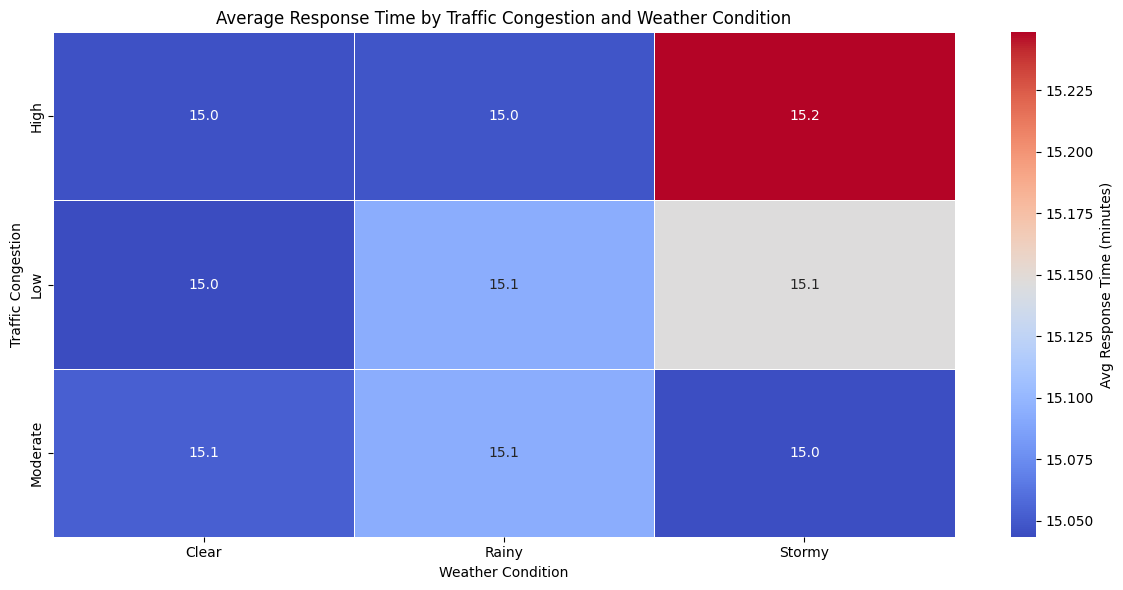

In [6]:
plt.figure(figsize=(12, 6))

ax = sns.heatmap(
    heat_df,
    annot = True,
    fmt = ".1f",
    cmap = 'coolwarm',
    linewidths = 0.5,
    cbar_kws = {'label': 'Avg Response Time (minutes)'}
)

plt.title('Average Response Time by Traffic Congestion and Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Traffic Congestion')
plt.tight_layout()
plt.show()

In [9]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [10]:
df['Hour'] = df['Timestamp'].dt.hour
df['Hour']

0          0
1          0
2          0
3          0
4          0
          ..
368060    23
368061    23
368062    23
368063    23
368064     0
Name: Hour, Length: 368065, dtype: int32

In [11]:
hourly_avg = df.groupby('Hour')['Response_Time'].mean().reset_index()
hourly_avg

Hour  Response_Time
0      0      15.109096
1      1      15.119766
2      2      15.073793
3      3      15.064489
4      4      14.943212
5      5      15.050351
6      6      15.057304
7      7      15.034187
8      8      15.083836
9      9      15.076591
10    10      15.081186
11    11      15.078994
12    12      15.088929
13    13      15.022761
14    14      15.073607
15    15      15.080634
16    16      14.966799
17    17      15.067643
18    18      15.056837
19    19      15.026639
20    20      15.043642
21    21      15.044529
22    22      15.036998
23    23      15.089753

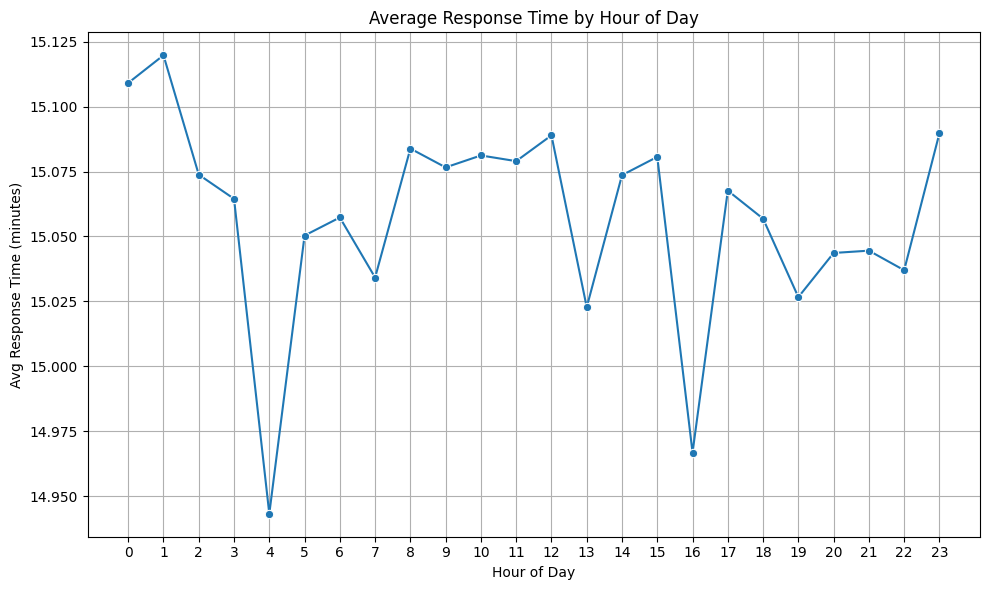

In [12]:
plt.figure(figsize = (10, 6))
sns.lineplot(data = hourly_avg, x = 'Hour', y = 'Response_Time', marker = 'o')
plt.title('Average Response Time by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Response Time (minutes)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()